In [38]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random

In [39]:
def create_dataset(howmanydatapoints,variance, step=2, correlation=False):
    val=1
    ys=[]
    for i in range(howmanydatapoints):
        y=val+ random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation=='pos':
            val+=step
        elif correlation and correlation=='neg':
            val-=step
    xs=[i for i in range (len(ys))]
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

In [48]:
#xs=np.array([1,2,3,4,5,6], dtype=np.float64)
#ys=np.array([5,4,6,5,6,7],dtype=np.float64)
xs, ys=create_dataset(40,10,2, correlation='neg')
def best_fit_slope_and_intercept(xs,ys):
    m=( ((mean(xs)*mean(ys))-mean(xs*ys))/((mean(xs)*mean(xs))-mean(xs*xs)))
    b=(mean(ys)-m*mean(xs))
    return m,b


In [49]:
def squared_error(ys_orig, ys_line):
    return sum((ys_line-ys_orig)**2)
def coefficient_of_determination (ys_orig, ys_line):
    y_mean_line=[mean(ys_orig) for y in ys_orig]
    squared_error_regr=squared_error(ys_orig, ys_line)
    squared_error_y_mean=squared_error(ys_orig, y_mean_line)
    return 1-(squared_error_regr/squared_error_y_mean)

In [50]:
m,b =best_fit_slope_and_intercept(xs,ys)
regression_line= [(m*x)+b for x in xs]
predict_x=8
predict_y=(m*predict_x)+b
r_squared=coefficient_of_determination(ys,regression_line)
print(r_squared)

0.9426772013387842


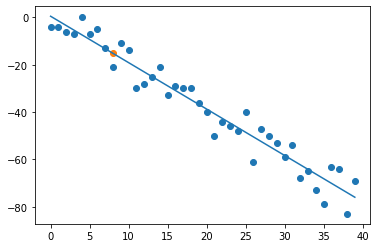

In [51]:
plt.scatter(xs,ys)
plt.scatter(predict_x, predict_y)
plt.plot(xs, regression_line)
plt.show()